In [1]:
import json
import os
import sys
import subprocess
import requests
import os.path
import gzip
import numpy as np
%matplotlib inline
from datetime import datetime
import matplotlib.pyplot as plt
import calendar
import random
import shutil

In [2]:
dataRoot = "/datasets/sagarj/InstagramDataset_2016_seeded/"
tracking = "Tracking/instaPopTrackedVids/"
PostRoot = dataRoot + "instaPop/"
global_searched_data = PostRoot + "search_data.json.gz"
copyDir = dataRoot + "instaVids/"
copyVids = copyDir + "videos/"
sampleVids = copyDir + "samples/"
metaDir = copyDir + "meta/"

In [3]:
def readGzipJSON(filePath):
    with gzip.open(filePath, 'rb') as f:
        file_content = f.read()
    data = json.loads(file_content)
    return data

def getDuration(path):
    if os.path.exists(path):
        p = subprocess.Popen(['ffprobe' , '-i' , path , '-show_format'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        out, err = p.communicate()
        return out , err
    else: 
        return "" , -1
    
def make_time():
    time=dt.datetime.now()
    return int(time.mktime(now.timetuple()))

def getTrackedPosts(trackedDir):
    posts = os.listdir(trackedDir)
    trackedPosts = dict()
    for post in posts:
        postDir = trackedDir + post
        postMeta = os.listdir(postDir)
        for f in postMeta:
            if f == "post_full_data.json.gz":
                trackedPosts[post] = dict()
                try:
                    trackedPosts[post] = readGzipJSON(postDir + "/" + f)
                except ValueError: 
                    print "Problem Decoding JSON"
                    
    return trackedPosts
        

def getFileList(dataRoot):
    users = os.listdir(dataRoot)
    allUsers = dict()
    for user in users:
        if user.split('.')[-1] == 'gz':
            continue
        directory = dataRoot + user + "/"
        subs = os.listdir(directory)
        for s in subs:
            if s.split('.')[-1] == 'gz':
                continue
            allUsers[s] = dict()
            allUsers[s]['Posts'] = dict()
            userDir = directory + s + "/"
            posts = os.listdir(userDir)
            for post in posts: 
                if post == "user_full_data.json.gz":
                    allUsers[s]['Meta'] = dict()
                    json_file = userDir + post
                    allUsers[s]['Meta'] = readGzipJSON(json_file)
                else:
                    if post.split('.')[-1] == 'gz':
                        continue
                    allUsers[s]['Posts'][post] = dict()
                    postDir = userDir + post + "/"
                    postFiles = os.listdir(postDir)
                    for f in postFiles:
                        if f == "post_full_data.json.gz":
                            json_file = postDir + f
                            allUsers[s]['Posts'][post]['Meta'] = dict()
                            allUsers[s]['Posts'][post]['Meta'] = readGzipJSON(json_file)
                        else:
                            media_file = postDir + f
                            allUsers[s]['Posts'][post]['path'] = media_file
    return allUsers
        
def getVideoPosts(users):
    verifiedPosts = []
    vidToImgLikes = []
    vidToImg = []
    for u in verifiedUsers:
        vidLikes = 1.0
        imgLikes = 1.0
        vids = 1.0
        imgs = 1.0
        for p in verifiedUsers[u]['Posts']:
            verifiedPosts.append(verifiedUsers[u]['Posts'][p])
            if verifiedUsers[u]['Posts'][p]['Meta']['media']['is_video']:
                vidLikes += verifiedUsers[u]['Posts'][p]['Meta']['media']['likes']['count']
                vids+=1
            else:
                imgLikes += verifiedUsers[u]['Posts'][p]['Meta']['media']['likes']['count']
                imgs+=1
        vidToImgLikes.append((vidLikes/imgLikes))
        vidToImg.append(vids/imgs)
        
def copyFile(src, dest):
    if not os.path.exists(src): 
        return
    try:
        shutil.copy(src, dest)
    # eg. src and dest are the same file
    except shutil.Error as e:
        print('Error: %s' % e)
    # eg. source or destination doesn't exist
    except IOError as e:
        print('Error: %s' % e.strerror)
    

In [4]:
trackedVids = getTrackedPosts(dataRoot + tracking)

Problem Decoding JSON
Problem Decoding JSON


In [5]:
trackedVids[trackedVids.keys()[1]]

{u'media': {u'caption': u'\U0001f63b\U0001f63b\U0001f63b',
  u'caption_is_edited': False,
  u'code': u'BNgh5zxA8Zx',
  u'comments': {u'count': 4,
   u'nodes': [{u'created_at': 1480676372.0,
     u'id': u'17844951784180720',
     u'text': u'\u041f\u0440\u0435\u043b\u0435\u0441\u0442\u044c',
     u'user': {u'id': u'2984298946',
      u'profile_pic_url': u'https://scontent.cdninstagram.com/t51.2885-19/s150x150/12783193_1694679310770349_1844594341_a.jpg',
      u'username': u'_elena_light123'}},
    {u'created_at': 1480680362.0,
     u'id': u'17844971590185331',
     u'text': u'\u041d\u0430\u0432\u0435\u0440\u043d\u043e\u0435 \u043f\u0435\u0440\u0435\u043f\u0438\u043b \u0432\u0447\u0435\u0440\u0430',
     u'user': {u'id': u'3921580547',
      u'profile_pic_url': u'https://scontent.cdninstagram.com/t51.2885-19/s150x150/14280391_342093042807577_1779622889_a.jpg',
      u'username': u'raya_arykbayeva'}},
    {u'created_at': 1480680441.0,
     u'id': u'17865856882049650',
     u'text': u'\u041

In [6]:
users = getFileList(PostRoot)

In [117]:
#users[users.keys()[1]]['Meta']['user']

In [92]:
users[users.keys()[1]]['Meta']['user']['id']

u'3996891168'

In [94]:
userStats = dict()
for u in users:
    if 'Meta' in users[u].keys():
        key = users[u]['Meta']['user']['id']
        userStats[key] = dict()
        userStats[key]['follows'] = users[u]['Meta']['user']['follows']['count']
        userStats[key]['followedBy'] = users[u]['Meta']['user']['followed_by']['count']
        userStats[key]['is_private'] = users[u]['Meta']['user']['is_private']
        userStats[key]['is_verified'] = users[u]['Meta']['user']['is_verified']

In [107]:
userStats[userStats.keys()[1]]

{'followedBy': 49, 'follows': 2, 'is_private': False, 'is_verified': False}

In [8]:
verifiedUsers = dict()
for u in users:
    if 'Meta' in users[u]:
        if users[u]['Meta']['user']:
            verifiedUsers[u] = dict()
            verifiedUsers[u] = users[u]
    

In [9]:
verifiedPosts = []
vidToImgLikes = []
vidPosts = dict()
vidToImg = []
for u in verifiedUsers:
    vidLikes = 1.0
    imgLikes = 1.0
    vids = 1.0
    imgs = 1.0
    for p in verifiedUsers[u]['Posts']:
        verifiedPosts.append(verifiedUsers[u]['Posts'][p])
        if verifiedUsers[u]['Posts'][p]['Meta']['media']['is_video']:
            vidPosts[p] = dict()
            vidPosts[p] = verifiedUsers[u]['Posts'][p]
            #vidPosts.append(verifiedUsers[u]['Posts'][p])
            vidLikes += verifiedUsers[u]['Posts'][p]['Meta']['media']['likes']['count']
            vids+=1
        else:
            imgLikes += verifiedUsers[u]['Posts'][p]['Meta']['media']['likes']['count']
            imgs+=1
    vidToImgLikes.append((vidLikes/imgLikes))
    vidToImg.append((vidLikes/vids)/(imgLikes/imgs))
    

In [116]:
#print vidPosts[vidPosts.keys()[9]] , vidPosts.keys()[1]

In [12]:
vidLikes = []
vidViews = []
for u in trackedVids:
    if 'media' in trackedVids[u]:
        vidLikes.append(trackedVids[u]['media']['likes']['count'])
        vidViews.append(trackedVids[u]['media']['video_views'])
    

In [13]:
vidLikes  = [1 if i < 1 else i for i in vidLikes]
vidViews  = [1 if i < 1 else i for i in vidViews]

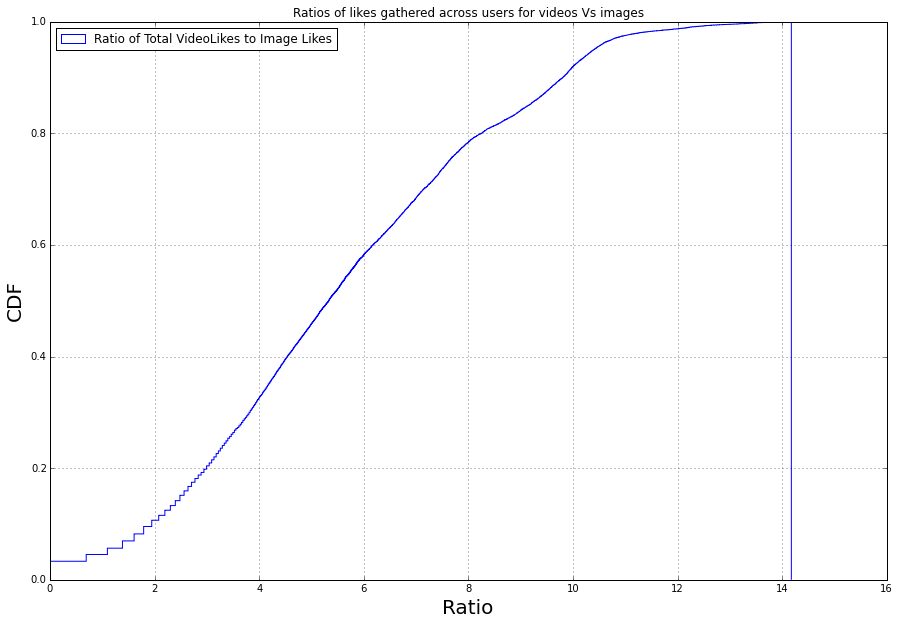

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.hist(np.log(vidLikes), 10000, normed=1,histtype='step', cumulative=True,linewidth = 1.0)
plt.title("Ratios of likes gathered across users for videos Vs images")
plt.xlabel("Ratio",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['Ratio of Total VideoLikes to Image Likes ' , 'Ratio of Likes per video to Likes per image'], loc='upper left')
plt.grid()
plt.show()

In [17]:
# print verifiedUsers[verifiedUsers.keys()[102]]['Meta']['user']['id']
# print verifiedUsers[verifiedUsers.keys()[102]]['Meta']['user']['username']
# print verifiedUsers[verifiedUsers.keys()[102]]['Posts']

# print verifiedPosts[1]['path']

print vidPosts[vidPosts.keys()[1]]
print len(vidPosts)

{'path': '/datasets/sagarj/InstagramDataset_2016_seeded/instaPop/April Johnson/856559526__april_johnson_/BHXssefhXSq/13605493_1748023018808426_1372735622_s.mp4', 'Meta': {u'media': {u'caption_is_edited': False, u'code': u'BHXssefhXSq', u'video_views': 199, u'video_url': u'https://scontent.cdninstagram.com/t50.2886-16/13605493_1748023018808426_1372735622_s.mp4', u'usertags': {u'nodes': []}, u'comments_disabled': False, u'owner': {u'username': u'_april_johnson_', u'full_name': u'April Johnson', u'requested_by_viewer': False, u'followed_by_viewer': False, u'has_blocked_viewer': False, u'profile_pic_url': u'https://scontent.cdninstagram.com/t51.2885-19/s150x150/14727451_645209805639395_347962504971812864_a.jpg', u'is_unpublished': False, u'blocked_by_viewer': False, u'id': u'856559526', u'is_private': False}, u'comments': {u'count': 0, u'page_info': {u'has_previous_page': False, u'start_cursor': None, u'end_cursor': None, u'has_next_page': False}, u'nodes': []}, u'is_ad': False, u'caption'

In [18]:
vidToImgLikes = [min(i,10.0) for i in vidToImgLikes]
vidToImg = [min(i,10.0) for i in vidToImg]

In [19]:
print np.median(vidToImgLikes), len(vidToImgLikes)

0.174418604651 3243


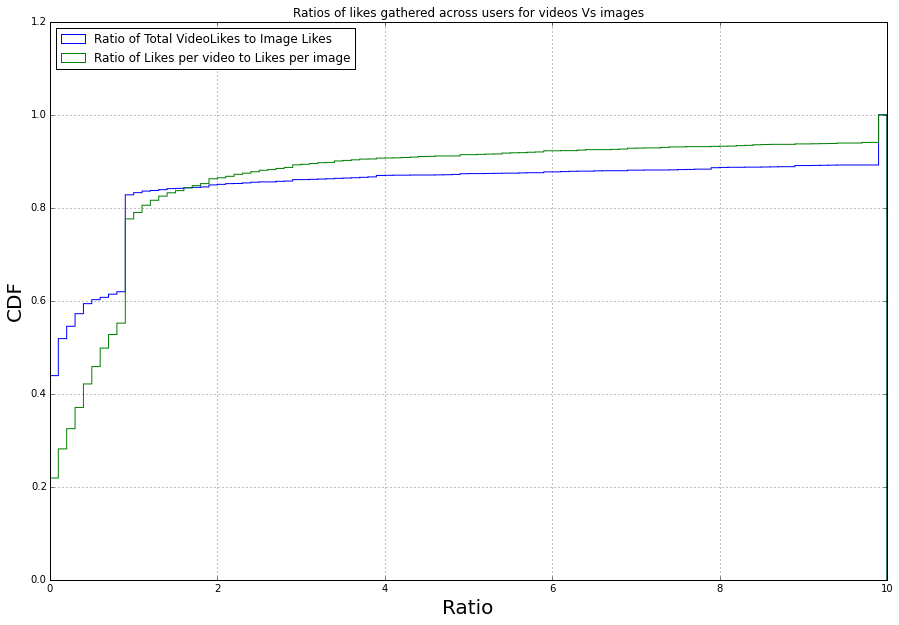

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.hist(vidToImgLikes, 100, normed=1,histtype='step', cumulative=True,linewidth = 1.0)
plt.hist(vidToImg, 100, normed=1,histtype='step', cumulative=True,linewidth = 1.0)
plt.title("Ratios of likes gathered across users for videos Vs images")
plt.xlabel("Ratio",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['Ratio of Total VideoLikes to Image Likes ' , 'Ratio of Likes per video to Likes per image'], loc='upper left')
plt.grid()
plt.show()

In [21]:
len(verifiedPosts)

80911

In [24]:
out , err = getDuration(vidPosts[vidPosts.keys()[1]]['path'])
print out.split('\n')[7].split("=")[1]

9.010000


In [44]:
vidPosts[vidPosts.keys()[1]]['Meta']['media']['code']

u'BHXssefhXSq'

In [47]:
#durationDict = dict()

In [48]:

# for k in vidPosts:
#     post = vidPosts[k]
#     if post['Meta']['media']['code'] not in durationDict:
#         if 'path' not in post:
#             continue
#         out , err = getDuration(post['path'])
#         if err > 0:
#             modes = out.split('\n')
#             if len(modes) < 8 :
#                 continue
#             duration = modes[7]
#             if duration.split("=")[0] == 'duration':
#                 durationDict[post['Meta']['media']['code']] = duration.split("=")[1]
    

In [49]:
#len(durationDict.keys())

In [50]:
# trackedVids[trackedVids.keys()[100]]['media']

In [51]:
# metaDict = dict()

In [52]:
# for d in durationDict: 
#     if d in trackedVids:
#         if 'media' in trackedVids[d]:
#             time = datetime.fromtimestamp(int(trackedVids[d]['media']['date'])).strftime('%Y-%m-%d') 
#             thresh = datetime.strptime('2016-03-01','%Y-%m-%d')
#             uploadTime = datetime.strptime(time,'%Y-%m-%d')
#             if uploadTime > thresh:
#                 metaDict[d] = dict()
#                 metaDict[d]['likes'] = trackedVids[d]['media']['likes']['count']
#                 metaDict[d]['views'] = trackedVids[d]['media']['video_views']
#                 metaDict[d]['length'] = durationDict[d]
#                 metaDict[d]['meta'] = vidPosts[d]

In [53]:
# for d in durationDict: 
#     if d in trackedVids:
#         if 'media' in trackedVids[d]:
# #             time = datetime.fromtimestamp(int(trackedVids[d]['media']['date'])).strftime('%Y-%m-%d') 
# #             thresh = datetime.strptime('2016-03-01','%Y-%m-%d')
# #             uploadTime = datetime.strptime(time,'%Y-%m-%d')
# #             if uploadTime > thresh:
#             metaDict[d] = dict()
#             metaDict[d]['likes'] = trackedVids[d]['media']['likes']['count']
#             metaDict[d]['views'] = trackedVids[d]['media']['video_views']
#             metaDict[d]['length'] = durationDict[d]
#             metaDict[d]['meta'] = vidPosts[d]

In [54]:
# durations = []
# for k in metaDict: 
    
#     durations.append(float(metaDict[k]['length']))
# np.median(durations)

In [55]:
# with open(dataRoot + 'InstaMeta.json', 'w') as fp:
#     json.dump(metaDict, fp)

In [56]:
with open(dataRoot + 'InstaMeta.json', 'rb') as fp:
    metaDict = json.load(fp)

In [57]:


longDict = {k: v for k, v in metaDict.iteritems() if float(v['length']) > 45.0 }

In [67]:
shortDict = {k: v for k, v in metaDict.iteritems() if float(v['length']) < 15.0 }

In [68]:
len(shortDict)

8106

In [72]:
sampledLong = random.sample(longDict.items() , 1000)
sampledShort = random.sample(shortDict.items() , 6000)

In [62]:
sampledShort[100][1]['views']

0

In [63]:
longLikesPerViews = []
shortLikesPerViews = []
for u in sampledLong:        
    views = u[1]['views']
    likes = u[1]['likes']
    if views < 1:
        views = 1
    if likes < 1:
        likes = 1
    longLikesPerViews.append(float(likes))
for u in sampledShort:   
    views = u[1]['views']
    likes = u[1]['likes']
    if views < 1:
        views = 1
    if likes < 1:
        likes = 1
    shortLikesPerViews.append(float(likes))

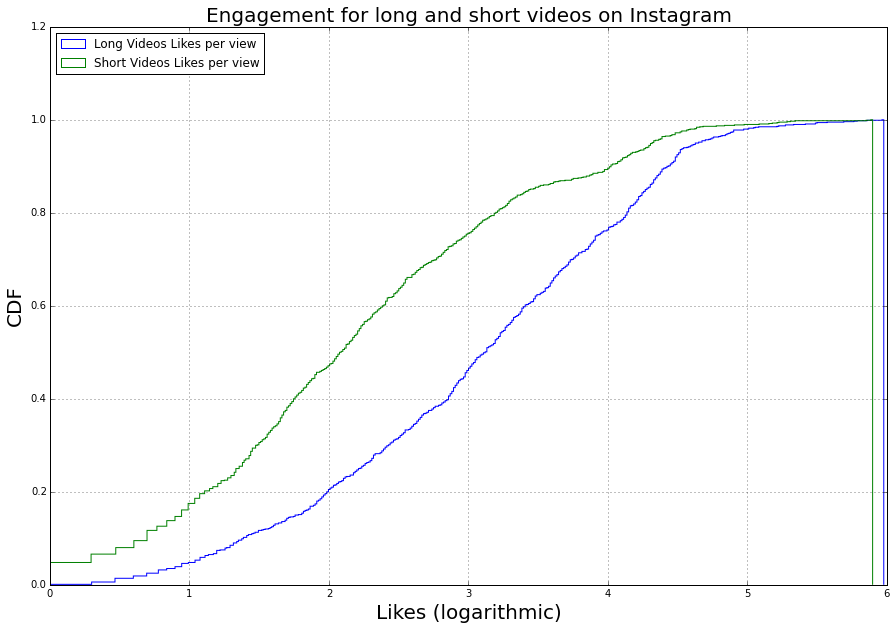

In [64]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.hist(np.log10(longLikesPerViews), 500, normed=1,histtype='step', cumulative=True,linewidth = 1.0)
plt.hist(np.log10(shortLikesPerViews), 500, normed=1,histtype='step', cumulative=True,linewidth = 1.0)
plt.title("Engagement for long and short videos on Instagram" , fontsize = 20)
plt.xlabel("Likes (logarithmic)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['Long Videos Likes per view ' , 'Short Videos Likes per view'], loc='upper left')
plt.grid()
plt.show()

In [65]:
# sampledVideos = random.sample(metaDict.items() , 6000)
# for i in sampledVideos:
#     print i[1]['length']

6.386000
5.654000
5.968000
6.507000
23.662000
25.061000
18.646000
14.615000
47.741000
43.399000
14.165000
11.680000
14.652000
12.841000
9.544000
6.572000
22.199000
14.699000
3.537000
55.891000
15.093000
12.413000
48.112000
23.685000
15.047000
60.117000
14.745000
60.117000
60.117000
6.595000
10.566000
5.643000
6.270000
15.093000
15.279000
28.399000
6.340000
6.595000
17.880000
6.572000
9.753000
15.016000
6.572000
6.665000
6.640000
60.117000
6.479000
16.603000
47.996000
11.634000
19.072000
20.480000
19.947000
14.745000
33.878000
6.061000
60.047000
6.595000
60.117000
6.595000
55.403000
59.560000
29.663000
6.440000
26.843000
5.782000
60.064000
8.917000
27.238000
15.163000
60.067000
15.093000
6.200000
53.499000
11.007000
29.234000
13.080000
13.213000
6.223000
13.398000
39.312000
60.117000
6.363000
13.514000
60.063000
13.863000
6.874000
15.070000
6.595000
6.316000
6.247000
26.541000
5.106000
7.083000
3.804000
24.428000
14.977000
55.682000
6.572000
6.507000
6.943000
11.946000
9.944000
15.09300

In [73]:
# sampleDir = "/datasets/sagarj/instaSample6000/"
# for s in sampledShort:
#     metaDir = sampleDir + "meta/"
#     vidDir = sampleDir + "videos/"
#     if 'path' in s[1]['meta']:
#         fp = open(metaDir + str(s[0]) + ".json" , 'wb')
#         json.dump(s[1],fp)
#         fp.close()
#         copyFile(s[1]['meta']['path'] , vidDir + str(s[0]) + ".mp4")

In [118]:
# metaDir = "/datasets/sagarj/instaSample6000/meta/"
# files = os.listdir(metaDir)
# sampledVideos = []
# for f in files:
#     vid = json.load(open(metaDir + f))
#     sampledVideos.append(vid)

In [124]:
sampledVideos[1]['meta']['Meta']['media']['code']

u'BM899wHh_Lz'

In [122]:

sampledVideos[1]['meta']['Meta']['media']['owner']['id']

u'25880325'

In [125]:
len(sampledVideos)

6413

In [128]:
# vidStats = dict()
# for vid in sampledVideos:
#     key = vid['meta']['Meta']['media']['code']
#     vidStats[key] = dict()
#     vidStats[key]['likes'] = vid['likes']
#     vidStats[key]['views'] = vid['views']
#     vidStats[key]['length'] = vid['length']
#     uid =  vid['meta']['Meta']['media']['owner']['id']
#     vidStats[key]['followers'] = userStats[uid]['followedBy']
#     vidStats[key]['follows'] = userStats[uid]['follows']
    
    

In [129]:
print vidStats[vidStats.keys()[1]]

{'follows': 68, 'length': u'6.572000', 'followers': 1564, 'likes': 62, 'views': 0}


In [130]:
json.dump(vidStats, open('../Logs/instaSample6000stats.json', 'wb'))

In [49]:
duration = []
likes = []
views = []
for entry in metaDict:
    if metaDict[entry]['likes'] > 20:
        duration.append(metaDict[entry]['length'])
        #likesPerViews.append(float(metaDict[entry]['likes'])/float(metaDict[entry]['views']+1))
        likes.append(float(metaDict[entry]['likes']))
        views.append(float(metaDict[entry]['views']))

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.hist(vidToImgLikes, 100, normed=1,histtype='step', cumulative=True,linewidth = 1.0)
plt.hist(vidToImg, 100, normed=1,histtype='step', cumulative=True,linewidth = 1.0)
plt.title("Ratios of likes gathered across users for videos Vs images")
plt.xlabel("Ratio",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['Ratio of Total VideoLikes to Image Likes ' , 'Ratio of Likes per video to Likes per image'], loc='upper left')
plt.grid()
plt.show()

In [50]:
d = [float(i) for i in duration]

In [51]:
print np.median(likes), np.median(views) , np.median(d)

489.0 2084.5 14.35


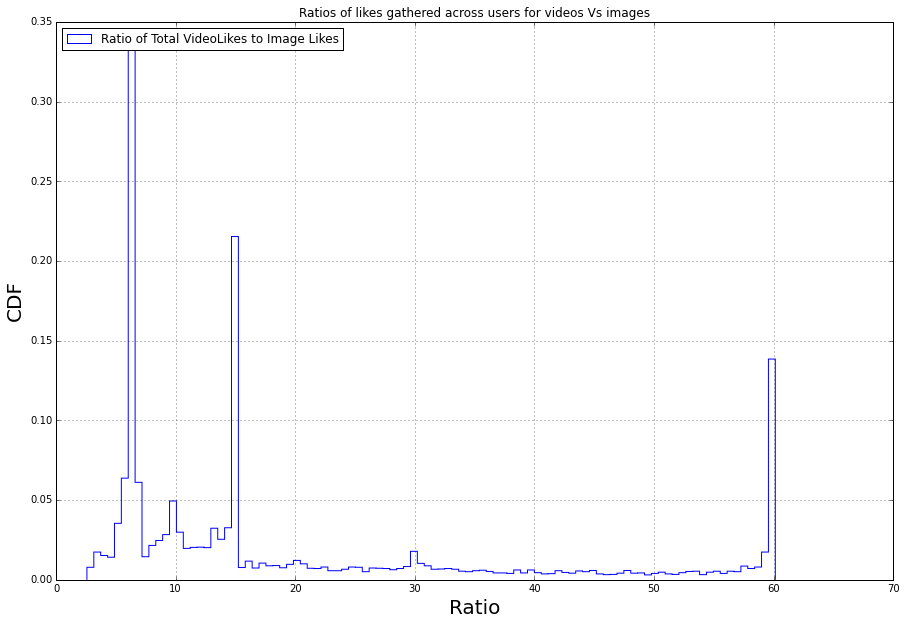

In [59]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.hist(d, 100, normed=1,histtype='step', cumulative=True,linewidth = 1.0)
#plt.hist(vidToImg, 100, normed=1,histtype='step', cumulative=True,linewidth = 1.0)
plt.title("Ratios of likes gathered across users for videos Vs images")
plt.xlabel("Ratio",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['Ratio of Total VideoLikes to Image Likes ' , 'Ratio of Likes per video to Likes per image'], loc='upper left')
plt.grid()
plt.show()

In [53]:
heatmap, xedges, yedges = np.histogram2d(d , np.log10(likes), bins=50)
#extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

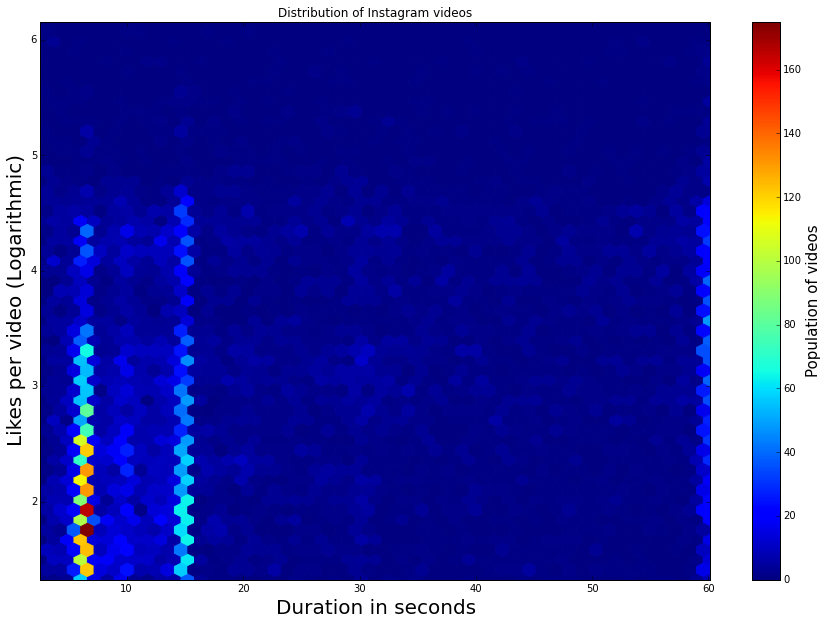

In [57]:
# if 'bins=None', then color of each hexagon corresponds directly to its count
# 'C' is optional--it maps values to x-y coordinates; if 'C' is None (default) then 
# the result is a pure 2D histogram 
from matplotlib import cm as CM
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
x = d

y = np.log10(likes)
gridsize=50
plt.hexbin(x, y, gridsize=gridsize, cmap=CM.jet, bins=None)
plt.axis([np.min(x), np.max(x), np.min(y), np.max(y)])
plt.title("Distribution of Instagram videos")
plt.xlabel("Duration in seconds",fontsize = 20)
plt.ylabel("Likes per video (Logarithmic)",fontsize = 20)

cb = plt.colorbar()
cb.set_label('Population of videos',fontsize = 15)
plt.show()   

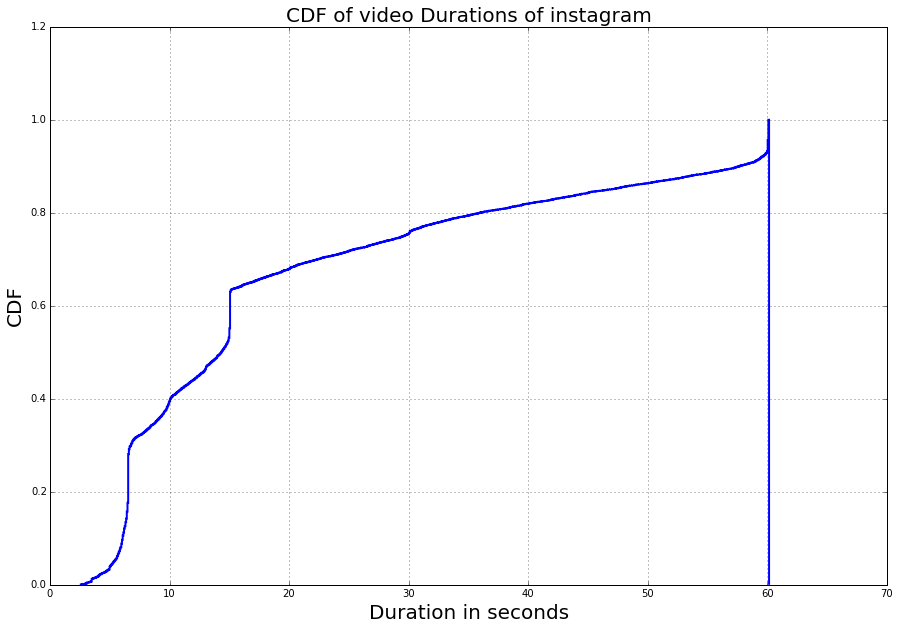

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.hist(d, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("CDF of video Durations of instagram", fontsize = 20)
plt.xlabel("Duration in seconds",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
#plt.legend(['Ratio of Total VideoLikes to Image Likes ' , 'Ratio of Likes per video to Likes per image'], loc='upper left')
plt.grid()
plt.show()

In [170]:
metaDict[metaDict.keys()[1]]['meta']['Meta']['media']

{u'caption': u'\U0001f63b\U0001f63b\U0001f63b',
 u'caption_is_edited': False,
 u'code': u'BNgh5zxA8Zx',
 u'comments': {u'count': 3,
  u'nodes': [{u'created_at': 1480676372.0,
    u'id': u'17844951784180720',
    u'text': u'\u041f\u0440\u0435\u043b\u0435\u0441\u0442\u044c',
    u'user': {u'id': u'2984298946',
     u'profile_pic_url': u'https://scontent.cdninstagram.com/t51.2885-19/s150x150/12783193_1694679310770349_1844594341_a.jpg',
     u'username': u'_elena_light123'}},
   {u'created_at': 1480680362.0,
    u'id': u'17844971590185331',
    u'text': u'\u041d\u0430\u0432\u0435\u0440\u043d\u043e\u0435 \u043f\u0435\u0440\u0435\u043f\u0438\u043b \u0432\u0447\u0435\u0440\u0430',
    u'user': {u'id': u'3921580547',
     u'profile_pic_url': u'https://scontent.cdninstagram.com/t51.2885-19/s150x150/14280391_342093042807577_1779622889_a.jpg',
     u'username': u'raya_arykbayeva'}},
   {u'created_at': 1480680441.0,
    u'id': u'17865856882049650',
    u'text': u'\u041a\u0442\u043e \u0432\u043e\u0

'2016-12-02 08:36:19'

In [189]:
dates = []
for k in metaDict:
    time = metaDict[k]['meta']['Meta']['media']['date']
    dates.append(datetime.fromtimestamp(int(time)).strftime('%Y-%m-%d'))

In [190]:
a = list(set(dates))

In [191]:
import pandas as pd

In [209]:
df.date = pd.to_datetime(dates)


In [213]:
df.date[100]

Timestamp('2014-09-14 00:00:00')

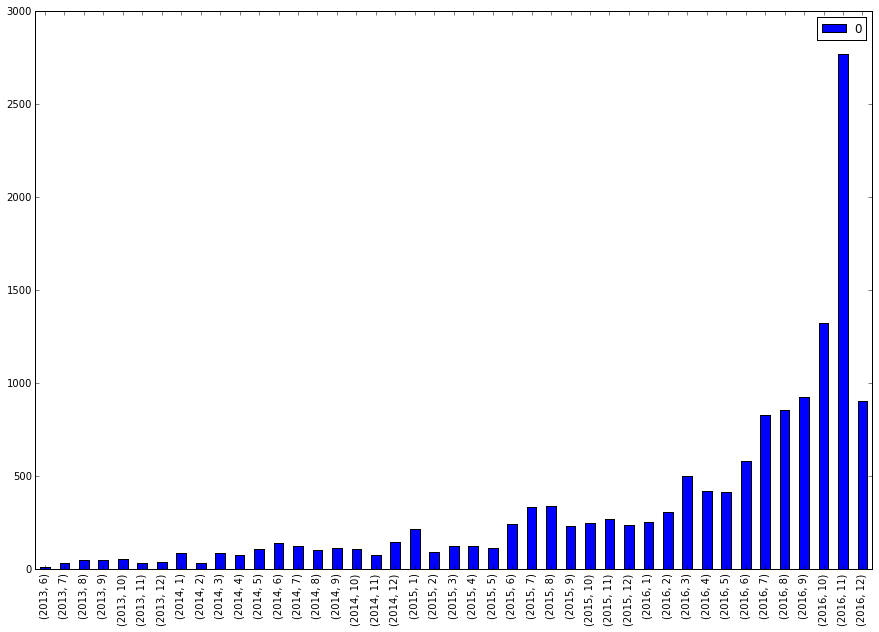

In [219]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
df.groupby([df.date.year, df.date.month]).count().plot(ax=fig.gca() , kind="bar")

In [221]:
    
len(df.date)


14171

In [230]:
len(df.date[(df.date >= datetime.strptime('2016-03-01','%Y-%m-%d')
)])

9531